In [3]:
!pip install sqlalchemy pyodbc pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.2/346.2 kB 6.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.4/602.4 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 5.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 40.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!apt update

Get:1 http://deb.debian.org/debian bookworm InRelease [151 kB]
Get:2 http://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:3 http://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:4 http://deb.debian.org/debian bookworm/main amd64 Packages [8789 kB]
Get:5 http://deb.debian.org/debian bookworm-updates/main amd64 Packages [8856 B]
Get:6 http://deb.debian.org/debian-security bookworm-security/main amd64 Packages [236 kB]
Fetched 9288 kB in 4s (2436 kB/s)3m             
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
All packages are up to date.


In [5]:
!apt install -y curl gnupg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dirmngr gnupg-l10n gnupg-utils gpg gpg-agent gpg-wks-client gpg-wks-server
  gpgconf gpgsm libassuan0 libbrotli1 libcurl4 libksba8 libldap-2.5-0
  libldap-common libnghttp2-14 libnpth0 libpsl5 librtmp1 libsasl2-2
  libsasl2-modules libsasl2-modules-db libssh2-1 pinentry-curses publicsuffix
Suggested packages:
  dbus-user-session libpam-systemd pinentry-gnome3 tor parcimonie xloadimage
  scdaemon libsasl2-modules-gssapi-mit | libsasl2-modules-gssapi-heimdal
  libsasl2-modules-ldap libsasl2-modules-otp libsasl2-modules-sql pinentry-doc
The following NEW packages will be installed:
  curl dirmngr gnupg gnupg-l10n gnupg-utils gpg gpg-agent gpg-wks-client
  gpg-wks-server gpgconf gpgsm libassuan0 libbrotli1 libcurl4 libksba8
  libldap-2.5-0 libldap-common libnghttp2-14 libnpth0 libpsl5 librtmp1
  libsasl2-2 libsasl2-modules libsasl2-modules-

In [6]:
!curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   983  100   983    0     0   5426      0 --:--:-- --:--:-- --:--:--  5491
OK


In [7]:
!curl https://packages.microsoft.com/config/debian/11/prod.list > /etc/apt/sources.list.d/mssql-release.list

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    88  100    88    0     0    233      0 --:--:-- --:--:-- --:--:--   235


In [8]:
!rm -f /etc/apt/sources.list.d/microsoft.list
!rm -f /etc/apt/sources.list.d/mssql-release.list

In [9]:
!curl https://packages.microsoft.com/keys/microsoft.asc | gpg --dearmor > /usr/share/keyrings/microsoft.gpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   983  100   983    0     0   7013      0 --:--:-- --:--:-- --:--:--  7175


In [10]:
!echo "deb [arch=amd64 signed-by=/usr/share/keyrings/microsoft.gpg] https://packages.microsoft.com/debian/11/prod bullseye main" > /etc/apt/sources.list.d/microsoft.list

In [11]:
!apt update

Hit:1 http://deb.debian.org/debian bookworm InRelease
Hit:2 http://deb.debian.org/debian bookworm-updates InRelease                 
Hit:3 http://deb.debian.org/debian-security bookworm-security InRelease       
Get:4 https://packages.microsoft.com/debian/11/prod bullseye InRelease [3650 B]
Get:5 https://packages.microsoft.com/debian/11/prod bullseye/main all Packages [1426 B]
Get:6 https://packages.microsoft.com/debian/11/prod bullseye/main amd64 Packages [161 kB]
Fetched 166 kB in 1s (324 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
All packages are up to date.


In [13]:
!ACCEPT_EULA=Y apt install -y msodbcsql18

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libltdl7 libodbc1 odbcinst odbcinst1debian2 unixodbc
Suggested packages:
  msodbcsql17 unixodbc-bin
The following NEW packages will be installed:
  libltdl7 libodbc1 msodbcsql18 odbcinst odbcinst1debian2 unixodbc
0 upgraded, 6 newly installed, 0 to remove and 0 not upgraded.
Need to get 1771 kB of archives.
After this operation, 1490 kB of additional disk space will be used.
Get:1 http://deb.debian.org/debian bookworm/main amd64 libltdl7 amd64 2.4.7-7~deb12u1 [393 kB]
Get:2 https://packages.microsoft.com/debian/11/prod bullseye/main amd64 libodbc1 amd64 2.3.11-3 [486 kB]
Get:3 https://packages.microsoft.com/debian/11/prod bullseye/main amd64 odbcinst1debian2 amd64 2.3.11-3 [99.6 kB]
Get:4 https://packages.microsoft.com/debian/11/prod bullseye/main amd64 odbcinst amd64 2.3.11-3 [13.2 kB]
Get:5 https://packages.microsoft.com/debian/11/pro

In [14]:
!odbcinst -q -d

[ODBC Driver 18 for SQL Server]


In [15]:
!apt install -y unixodbc unixodbc-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unixodbc is already the newest version (2.3.11-3).
unixodbc set to manually installed.
The following additional packages will be installed:
  autoconf automake autotools-dev binutils binutils-common
  binutils-x86-64-linux-gnu cpp cpp-12 file fontconfig-config
  fonts-dejavu-core gcc gcc-12 libabsl20220623 libaom3 libasan8 libatomic1
  libavif15 libbinutils libbsd0 libc-dev-bin libc-devtools libc6-dev libcc1-0
  libcrypt-dev libctf-nobfd0 libctf0 libdav1d6 libde265-0 libdeflate0
  libexpat1 libfontconfig1 libfreetype6 libgav1-1 libgcc-12-dev libgd3
  libgdbm-compat4 libgomp1 libgprofng0 libheif1 libisl23 libitm1 libjansson4
  libjbig0 libjpeg62-turbo liblerc4 liblsan0 libltdl-dev libmagic-mgc
  libmagic1 libmpc3 libmpfr6 libnsl-dev libnuma1 libperl5.36 libpng16-16
  libquadmath0 librav1e0 libsvtav1enc1 libtiff6 libtirpc-dev libtool libtsan2
  libubsan1 libwebp7 libx11-6 libx11-data libx265-

In [16]:
import pyodbc
print(pyodbc.drivers())

['ODBC Driver 18 for SQL Server']


In [17]:
from sqlalchemy import create_engine
import pandas as pd

server = '185.137.233.241'
port = '33333'
database = 'market'
username = 'analytics'

In [18]:
import getpass
password = getpass.getpass()

 ········


- [ ] Посмотреть какие есть таблицы
- [ ] Посмотреть содержимое таблиц
- [ ] Сохранять что может потенциально понадобиться для прогнозирования цены себестоимости

In [19]:
import pyodbc 
cnxn = pyodbc.connect("Driver={ODBC Driver 18 for SQL Server};"
                      f"Server={server},{port};"
                      f"Database={database};"
                      f"uid={username};pwd={password};"
                      "TrustServerCertificate=yes;")

In [85]:
query = "SELECT * FROM cost_product"
df = pd.read_sql(query, cnxn)

/tmp/ipykernel_18/802621901.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnxn)


In [86]:
df

,Код,Период,Наименование,ШК,АртикулЖ,ЦенаСВ
0,1,2024-01-01,"Коробка для обуви AT-001W,белый",4673737630015,AT-001W,383.820000
1,2,2024-01-01,"Коробка для хранения AT-002G,серый",4673737630022,AT-002G,529.500000
2,3,2024-01-01,"Вешалка напольная AT-003BK,черный",4673737630039,AT-003BK,0.000000
3,4,2024-01-01,"Вешалка напольная AT-003BK,черный",4673737630039,AT-003BK,0.000000
4,5,2024-01-01,Вешалка напольная,4673737630060,AT-003W,0.000000
...,...,...,...,...,...,...
1003,73,2024-12-01,Зеркало настольное,4673737631609,TM2-2BK,1349.873161
1004,74,2024-12-01,Зеркало настольное,4673737631593,TM2-2WT,1338.777899
1005,75,2024-12-01,Набор сковородок,4673737631838,FP1-1,1841.654200
1006,76,2024-12-01,Набор сковородок,4673737631845,FP1-2,2195.285500


In [87]:
df[df['АртикулЖ'] == 'CPT1-1-1MGR']

,Код,Период,Наименование,ШК,АртикулЖ,ЦенаСВ
17,18,2024-01-01,Коврик,4673737631449,CPT1-1-1MGR,0.000000
104,105,2024-02-01,Коврик,4673737631449,CPT1-1-1MGR,631.040000
191,192,2024-03-01,Коврик,4673737631449,CPT1-1-1MGR,631.040000
278,279,2024-04-01,Коврик,4673737631449,CPT1-1-1MGR,655.360000
365,366,2024-05-01,Коврик,4673737631449,CPT1-1-1MGR,661.913600
452,453,2024-06-01,Коврик,4673737631449,CPT1-1-1MGR,661.913600
541,542,2024-07-01,Коврик,4673737631449,CPT1-1-1MGR,664.447783
625,626,2024-08-01,Коврик,4673737631449,CPT1-1-1MGR,656.505467
697,698,2024-09-01,Коврик,4673737631449,CPT1-1-1MGR,647.924344
782,783,2024-10-01,Коврик,4673737631449,CPT1-1-1MGR,653.944545


In [88]:
df[df['АртикулЖ'] == 'CPT1-1MGR']

,Код,Период,Наименование,ШК,АртикулЖ,ЦенаСВ


In [20]:
query = """SELECT COLUMN_NAME, DATA_TYPE, CHARACTER_MAXIMUM_LENGTH
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'CostPerDay';"""
df_daily = pd.read_sql(query, cnxn)

/tmp/ipykernel_18/3870680749.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_daily = pd.read_sql(query, cnxn)


In [21]:
df_daily

,COLUMN_NAME,DATA_TYPE,CHARACTER_MAXIMUM_LENGTH
0,Код,int,NaN
1,Период,datetime,NaN
2,Наименование,nvarchar,255.0
3,ШК,nvarchar,255.0
4,АртикулЖ,nvarchar,255.0
5,ЦенаСВ,float,NaN


In [91]:
df_daily['Период'].describe()

count                             2721
mean     2024-12-01 20:37:18.588753920
min                2024-11-14 00:00:00
25%                2024-11-23 00:00:00
50%                2024-12-03 00:00:00
75%                2024-12-11 00:00:00
max                2024-12-17 00:00:00
Name: Период, dtype: object

In [114]:
df_month_for_compare = pd.read_csv('data/Учёт продаж WB, Ozon, ЯМ, СММ. Декабрь - Выгрузка себестоимости (пользуемся).csv', header=1)

In [115]:
df_month_for_compare

,АртикулЖ,ТЕКУЩИЙ месяц,ШК,Наименование,янв,фев,мар,апр,май,июнь,...,октябрь,Ноябрь,дек,изменение нояб к окт,изменение декабря к нояб,тотал 2 месяца,Сервер СЕБЕС,АртикулЖ.1,ЦенаСВ,Unnamed: 22
0,DRL2-1,"1 323,56",4.673738e+12,Аккумуляторная ударная дрель-шуруповер,-,-,"1 367,86","1 367,86","1 381,54","1 381,54",...,"1 321,64","1 322,80","1 323,56","-0,09%","-0,06%","-0,15%","р.1 508,68",CPT1-1MGR,"р.800,34","0,15%"
1,DRL3-1,"628,09",4.673738e+12,Аккумуляторная ударная дрель-шуруповер,-,-,"628,09","628,09","634,37","634,37",...,"634,37","634,37","634,37","0,00%","0,00%","0,00%","р.652,88",CPT1-1MBE,"р.763,97","-1,00%"
2,DRL4-1,"1 549,00",4.673738e+12,Аккумуляторная ударная дрель-шуруповер,-,-,"1 487,52","1 487,52","1 502,40","1 502,40",...,"1 548,81","1 549,00","1 549,00","-0,01%","0,00%","-0,01%","р.1 746,43",CPT1-1BE,"р.652,46","0,01%"
3,DRL5-1,"1 740,51",4.673738e+12,Аккумуляторная ударная дрель-шуруповер,-,-,"1 744,38","1 744,38","1 761,82","1 761,82",...,"1 741,02","1 740,51","1 740,51","0,03%","0,00%","0,03%","р.1 972,93",CPT1-1GR,"р.651,45","-0,03%"
4,B-FCM1-1BK,"446,69",4.673738e+12,Аппарат для чистки лица B-FCM1-1BK,"446,69","446,69","446,69","446,69","451,16","451,16",...,"459,89","459,89","0,00","0,00%","0,00%","0,00%","р.446,69",H-GFC2-1,"р.537,32","-2,96%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DYWR1-1,"р.3 082,52",NaN
1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H-DSP1-1,"р.1 327,14",NaN
1934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DYDB1-1,"р.1 967,48",NaN
1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TM1-1WT,"р.1 434,81",NaN


In [120]:
mapper = {'янв': 'january', 'фев': 'february', 'мар': 'march', 'июль': 'july',
          'июнь': 'june', 'апр': 'april', 'август': 'august',
          'май': 'may', 'октябрь': 'october',
                      'Ноябрь': 'november', 'дек': 'september'}

df_month_for_compare = df_month_for_compare.set_index('АртикулЖ')

df_month_for_compare = df_month_for_compare.rename(mapper, axis=1)

In [121]:
df_month_for_compare[list(mapper.values())]

,january,february,march,july,june,april,august,may,october,november,september
АртикулЖ,,,,,,,,,,,
DRL2-1,-,-,"1 367,86","1 333,36","1 381,54","1 367,86","1 321,49","1 381,54","1 321,64","1 322,80","1 323,56"
DRL3-1,-,-,"628,09","0,00","634,37","628,09","634,37","634,37","634,37","634,37","634,37"
DRL4-1,-,-,"1 487,52","1 564,49","1 502,40","1 487,52","1 548,82","1 502,40","1 548,81","1 549,00","1 549,00"
DRL5-1,-,-,"1 744,38","1 757,91","1 761,82","1 744,38","1 740,93","1 761,82","1 741,02","1 740,51","1 740,51"
B-FCM1-1BK,"446,69","446,69","446,69","0,00","451,16","446,69","459,89","451,16","459,89","459,89","0,00"
...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# cnxn.close()

In [123]:
df['Период'] = pd.to_datetime(df['Период'])

In [108]:
df['Месяц'] = df['Период'].dt.month_name().str.lower()

In [110]:
pivot_df = df.pivot_table(
    index='АртикулЖ', 
    columns='Месяц', 
    values='ЦенаСВ', 
    aggfunc='sum', 
    fill_value=0
)

In [112]:
pivot_df = pivot_df.rename(columns={'АртикулЖ': 'product_id'})

In [113]:
pivot_df

Месяц,april,august,december,february,january,july,june,march,may,november,october,september
АртикулЖ,,,,,,,,,,,,
AT-001W,352.10,355.903800,355.799914,352.10,383.82,359.466600,355.6210,352.10,355.6210,355.804636,355.907587,352.383661
AT-002G,534.54,0.000000,541.630518,534.54,529.50,521.961007,539.8854,534.54,539.8854,542.354718,505.028964,496.702580
AT-003BK,1931.54,980.351866,980.351866,1931.54,0.00,990.155384,1950.8554,1931.54,1950.8554,980.351866,980.351866,970.645412
AT-003W,966.77,981.362945,981.362945,966.77,0.00,991.176574,976.4377,966.77,976.4377,981.362945,981.362945,971.646480
B-DRS1-1,582.66,0.000000,602.853423,582.66,845.49,620.881241,588.4866,582.66,588.4866,599.761867,597.201827,590.165704
...,...,...,...,...,...,...,...,...,...,...,...,...
TM2-2BK,0.00,0.000000,1349.873161,0.00,0.00,0.000000,0.0000,0.00,0.0000,1349.873376,1349.873126,0.000000
TM2-2WT,0.00,0.000000,1338.777899,0.00,0.00,0.000000,0.0000,0.00,0.0000,1349.873167,1349.873169,0.000000
TVB1-1,776.00,0.000000,0.000000,776.00,776.00,731.326311,783.7600,776.00,783.7600,0.000000,725.045800,720.574346


In [156]:
def map_price(value):
    if value == '-' or type(value) != str:
        return np.nan
    return float(value.replace(' ', '').replace('\xa0', '').replace(',', '.'))

In [198]:
column_mapper = {'CPT1-1-1MGR': 'CPT1-1MGR', ' FP1-2': 'FP1-2', ' HNG1-1W': 'HNG1-1W'}

columns_for_compare = list(set(pivot_df.columns) - set(['november', 'december']))

for product_id in pivot_df.index:
    if product_id in ['LDM1-1', 'PHA1-1BK']:
        continue
    df_for_compare_row = pivot_df.loc[product_id]
    df_month_only_for_compare_column = column_mapper[product_id] if product_id in column_mapper else product_id
    if df_month_only_for_compare_column in df_month_for_compare.index:
        df_month_only_for_compare_rows = df_month_for_compare.loc[df_month_only_for_compare_column]
    else:
        df_month_only_for_compare_rows = df_month_for_compare.loc[' ' + df_month_only_for_compare_column]
    df_for_compare_subrow = df_month_only_for_compare_rows[columns_for_compare].map(map_price).fillna(0.)
    df_base_subrow = df_for_compare_row[columns_for_compare].map(map_price).fillna(0.)
    compare_result = (df_for_compare_subrow == df_base_subrow) | (df_for_compare_subrow.isna() & df_base_subrow.isna())
    if len(df_month_only_for_compare_rows.shape) == 1:
        print(product_id, compare_result.all())
    else:
        print(product_id, compare_result.all(axis=1).any())

AT-001W False
AT-002G False
AT-003BK False
AT-003W False
B-DRS1-1 False
B-FCM1-1BK False
B-FCM1-1WT False
B-MCM1-1 False
B-MG1-1 False
BC1-1BE False
BC1-1BR False
BC1-1WT False
BC1-2GR False
BC1-2WT False
CHS1-1 False
CPT1-1-1MGR False
CPT1-1BE False
CPT1-1GR False
CPT1-1MBE False
DRL2-1 False
DRL3-1 False
DRL4-1 False
DRL5-1 False
DYDB1-1 False
DYGR1-1 False
DYWR1-1 False
FP1-1 False
FP1-2 False
FP1-3 False
GR1-2 False
H-BOWL1-2 False
H-BOWL1-2C False
H-CPT2-1BE False
H-CPT2-1CA False
H-DSP1-1 False
H-GFC1-1 False
H-GFC1-2 False
H-GFC1-3 False
H-GFC2-1 False
H-LB1-1GR False
H-LB1-1WT False
H-LED-1-1-15 False
H-LED-1-1-20 False
H-MOP1-1 False
H-ORG1-1 False
H-ORG1-2 False
H-ORG1-3 False
H-SJ1-1 False
H-TC1-1WT False
H-TC1-2WT False
H-TC1-3WT False
H-TC1-4WT False
H-TC1-5WT False
HL1-1 False
HNG1-1BK False
K-EBR-1-1 False
K-PMC1-1 False
PHA1-1GR False
PHA1-1PK False
PHA1-1RD False
PHA1-1WT False
PT1-1 False
PT1-2 False
PT1-3 False
PT1-4 False
PT1-5 False
PT1-6 False
PT1-7 False
PT2-1RD 

In [182]:
import numpy as np

diffs = []

for product_id in pivot_df.index:
    if product_id in ['LDM1-1', 'PHA1-1BK']:
        continue
    df_for_compare_row = pivot_df.loc[product_id]
    df_month_only_for_compare_column = column_mapper[product_id] if product_id in column_mapper else product_id
    if df_month_only_for_compare_column in df_month_for_compare.index:
        df_month_only_for_compare_rows = df_month_for_compare.loc[df_month_only_for_compare_column]
    else:
        df_month_only_for_compare_rows = df_month_for_compare.loc[' ' + df_month_only_for_compare_column]
    df_for_compare_subrow = df_month_only_for_compare_rows[columns_for_compare].map(map_price).fillna(0.)
    df_base_subrow = df_for_compare_row[columns_for_compare].map(map_price).fillna(0.)
    compare_result = (df_for_compare_subrow == df_base_subrow) | (df_for_compare_subrow.isna() & df_base_subrow.isna())
    if len(df_month_only_for_compare_rows.shape) == 1:
        diffs.append((compare_result == False).sum())
    else:
        sub_diffs = (compare_result == False).sum(axis=1)
        unique_sub_diffs = np.unique(sub_diffs)
        if len(unique_sub_diffs) == 1:
            diffs.append(unique_sub_diffs[0])
        else:
            diffs.extend(unique_sub_diffs)

In [173]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


(array([ 9.,  0.,  1.,  4.,  0.,  0.,  5.,  9.,  5., 53.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

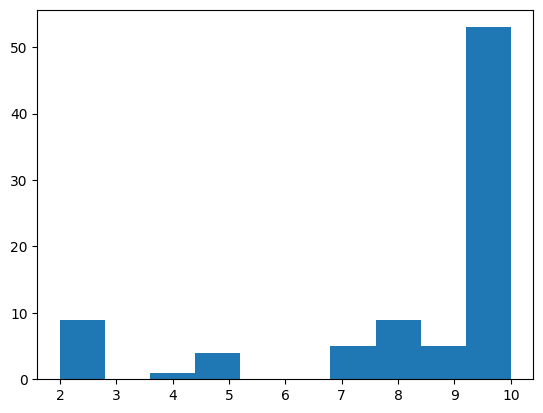

In [183]:
from matplotlib import pyplot as plt

plt.hist(diffs, bins=10)

In [208]:
diffs = []

for product_id in pivot_df.index:
    if product_id in ['LDM1-1', 'PHA1-1BK']:
        continue
    df_for_compare_row = pivot_df.loc[product_id]
    df_month_only_for_compare_column = column_mapper[product_id] if product_id in column_mapper else product_id
    if df_month_only_for_compare_column in df_month_for_compare.index:
        df_month_only_for_compare_rows = df_month_for_compare.loc[df_month_only_for_compare_column]
    else:
        df_month_only_for_compare_rows = df_month_for_compare.loc[' ' + df_month_only_for_compare_column]
    df_for_compare_subrow = df_month_only_for_compare_rows[columns_for_compare].map(map_price).fillna(0.)
    df_base_subrow = df_for_compare_row[columns_for_compare].map(map_price).fillna(0.)
    compare_result = (df_for_compare_subrow == df_base_subrow) | (df_for_compare_subrow.isna() & df_base_subrow.isna())
    if len(df_month_only_for_compare_rows.shape) == 1:
        diffs.extend(zip(df_for_compare_subrow[compare_result == False], df_base_subrow[compare_result == False]))
    else:
        sub_diffs = (compare_result == False).sum(axis=1)
        unique_sub_diffs = np.unique(sub_diffs)
        if len(unique_sub_diffs) == 1:
            diffs.extend(zip(df_for_compare_subrow[compare_result == False].iloc[0], df_base_subrow[compare_result.iloc[0] == False]))
        else:
            for i in range(len(compare_result)):
                diffs.extend(zip(df_for_compare_subrow[compare_result == False].iloc[i], df_base_subrow[compare_result.iloc[i] == False]))
            # diffs.extend(unique_sub_diffs)

In [214]:
np.unique(list(zip(*diffs))[1])

array([0.])

In [276]:
query = "SELECT * FROM cost_product"
df = pd.read_sql(query, cnxn)

/tmp/ipykernel_18/802621901.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnxn)


In [277]:
df['Период'] = pd.to_datetime(df['Период'])

In [278]:
df

,Код,Период,Наименование,ШК,АртикулЖ,ЦенаСВ
0,1,2024-01-01,"Коробка для обуви AT-001W,белый",4673737630015,AT-001W,383.820000
1,2,2024-01-01,"Коробка для хранения AT-002G,серый",4673737630022,AT-002G,529.500000
2,3,2024-01-01,"Вешалка напольная AT-003BK,черный",4673737630039,AT-003BK,0.000000
3,4,2024-01-01,"Вешалка напольная AT-003BK,черный",4673737630039,AT-003BK,0.000000
4,5,2024-01-01,Вешалка напольная,4673737630060,AT-003W,0.000000
...,...,...,...,...,...,...
1003,73,2024-12-01,Зеркало настольное,4673737631609,TM2-2BK,1349.873161
1004,74,2024-12-01,Зеркало настольное,4673737631593,TM2-2WT,1338.777899
1005,75,2024-12-01,Набор сковородок,4673737631838,FP1-1,1841.654200
1006,76,2024-12-01,Набор сковородок,4673737631845,FP1-2,2195.285500


In [219]:
import getpass
pg_password = getpass.getpass()

 ········


In [223]:
DB_HOST='db'
DB_USER='user'
DB_NAME='app_db'
DB_PORT=5432

In [279]:
from psycopg2 import connect, sql

connection = connect(
    dbname=DB_NAME,
    user=DB_USER,
    password=pg_password,
    host=DB_HOST,
    port=DB_PORT
)
cursor = connection.cursor()

In [280]:
df.shape

(1008, 6)

In [281]:
df = df.drop_duplicates(subset=('Период', 'АртикулЖ', 'ЦенаСВ'))

In [282]:
df.shape

(874, 6)

In [283]:
from datetime import datetime, timedelta

days_in_month = {
    1: 31,
    2: 28,
    3: 31,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 31,
    9: 30,
    10: 31,
    11: 30,
    12: 31
}

for _, row in df.iterrows():
    start_date = row['Период']
    sku = row['АртикулЖ']
    price = row['ЦенаСВ']
    days = days_in_month[start_date.month]
    dates_for_check = [start_date + timedelta(days=i) for i in range(days)]
    end_date = datetime.now()
    dates = [date for date in dates_for_check if date < end_date]

    for date in dates:
        cursor.execute(
            sql.SQL('''
            INSERT INTO cost (sku, date, cost_in_kopecks) VALUES (%s, %s, %s)
            '''),
            [sku, date, round(price * 100 + 0.5)]
        )

In [284]:
connection.commit()
cursor.close()
connection.close()

In [1]:
query = "SELECT * FROM CostPerDay"
df_daily = pd.read_sql(query, cnxn)

NameError: name 'pd' is not defined

In [286]:
df_daily.shape

(2721, 6)

In [287]:
df_daily = df_daily.drop_duplicates(subset=('Период', 'АртикулЖ', 'ЦенаСВ'))

In [288]:
df_daily.shape

(2721, 6)

In [289]:
connection = connect(
    dbname=DB_NAME,
    user=DB_USER,
    password=pg_password,
    host=DB_HOST,
    port=DB_PORT
)
cursor = connection.cursor()

In [290]:
for _, row in df_daily.iterrows():
    date = row['Период']
    sku = row['АртикулЖ']
    price = row['ЦенаСВ']

    cursor.execute(
        sql.SQL('''
        INSERT INTO cost (sku, date, cost_in_kopecks)
        VALUES (%s, %s, %s)
        ON CONFLICT (sku, date) 
        DO UPDATE SET cost_in_kopecks = EXCLUDED.cost_in_kopecks
        '''),
        [sku, date, round(price * 100 + 0.5)]
    )

In [292]:
connection.commit()
cursor.close()
connection.close()